In [74]:
#Importing Libraries
#-------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
#Importing Data
#--------------
data = pd.read_csv("nyc_taxi_trip_duration.csv")
data.head() #displays first 5 rows of the data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [76]:
data.tail() #displays last 5 rows of the data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [77]:
data.shape

(729322, 11)

In [78]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [79]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [80]:
data.dtypes[data.dtypes == 'int64'] #displays variable that are integer type

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

In [81]:
data.dtypes[data.dtypes == 'float64'] #displays variable that are float type

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

In [82]:
data.dtypes[data.dtypes == 'object']

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

In [83]:
#converting varibales dtype

data["store_and_fwd_flag"] = data["store_and_fwd_flag"].astype('category') 
data['vendor_id'] = data['vendor_id'].astype('category')
#store_and_fwd_flag and has two categories so it is converted into categorical variable type

data.dtypes[data.dtypes =='category']


vendor_id             category
store_and_fwd_flag    category
dtype: object

In [84]:
#Creating new date and time variable 
#-----------------------------------
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()

data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday

data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour

data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

In [85]:
#Creating new categories
#-----------------------

def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'
    
data['pickup_timeofday']=data['pickup_hour'].apply(time_of_day)
data['dropoff_timeofday']=data['dropoff_hour'].apply(time_of_day)

In [86]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,Monday,Monday,0,0,16,16,2,2,Evening,Evening
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,Friday,Friday,4,4,23,23,3,3,Late night,Late night
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,Sunday,Sunday,6,6,17,18,2,2,Evening,Evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,Tuesday,Tuesday,1,1,9,10,1,1,Morning,Morning
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,Wednesday,Wednesday,2,2,6,6,2,2,Morning,Morning


In [87]:
data.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
pickup_day                    object
dropoff_day                   object
pickup_day_no                  int64
dropoff_day_no                 int64
pickup_hour                    int64
dropoff_hour                   int64
pickup_month                   int64
dropoff_month                  int64
pickup_timeofday              object
dropoff_timeofday             object
dtype: object

In [88]:
#Grouping all the numeric data
#-----------------------------
numeric_Var = data.select_dtypes(include=["int64","float"]).columns
numeric_Var

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'pickup_day_no', 'dropoff_day_no', 'pickup_hour', 'dropoff_hour',
       'pickup_month', 'dropoff_month'],
      dtype='object')

In [89]:
#Printing maximum of all numerical variable
#------------------------------------------
data[numeric_Var].max()

passenger_count      9.000000e+00
pickup_longitude    -6.589738e+01
pickup_latitude      5.188108e+01
dropoff_longitude   -6.589738e+01
dropoff_latitude     4.392103e+01
trip_duration        1.939736e+06
pickup_day_no        6.000000e+00
dropoff_day_no       6.000000e+00
pickup_hour          2.300000e+01
dropoff_hour         2.300000e+01
pickup_month         6.000000e+00
dropoff_month        7.000000e+00
dtype: float64

In [90]:
data[numeric_Var].min()

passenger_count        0.000000
pickup_longitude    -121.933342
pickup_latitude       34.712234
dropoff_longitude   -121.933304
dropoff_latitude      32.181141
trip_duration          1.000000
pickup_day_no          0.000000
dropoff_day_no         0.000000
pickup_hour            0.000000
dropoff_hour           0.000000
pickup_month           1.000000
dropoff_month          1.000000
dtype: float64

In [91]:
for vari in numeric_Var:
    print("range of {}{}{}{}{}{}{}{}".format(vari,":"," ","[",data[vari].min(), ", ",data[vari].max(),"]"))

range of passenger_count: [0, 9]
range of pickup_longitude: [-121.93334197998048, -65.89738464355469]
range of pickup_latitude: [34.71223449707032, 51.88108444213867]
range of dropoff_longitude: [-121.9333038330078, -65.89738464355469]
range of dropoff_latitude: [32.181140899658196, 43.92102813720703]
range of trip_duration: [1, 1939736]
range of pickup_day_no: [0, 6]
range of dropoff_day_no: [0, 6]
range of pickup_hour: [0, 23]
range of dropoff_hour: [0, 23]
range of pickup_month: [1, 6]
range of dropoff_month: [1, 7]


In [92]:
data.describe(include=["int64","float"])

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000,729322.000000,729322.00000,729322.000000,729322.000000
mean,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,3.049081,3.053015,13.611698,13.60616,3.518410,3.518764
std,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,1.954470,1.956866,6.402853,6.48637,1.680661,1.680815
min,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000
25%,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,1.000000,1.000000,9.000000,9.00000,2.000000,2.000000
50%,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,3.000000,3.000000,14.000000,14.00000,4.000000,4.000000
75%,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,5.000000,5.000000,19.000000,19.00000,5.000000,5.000000
max,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,6.000000,6.000000,23.000000,23.00000,6.000000,7.000000


In [93]:
#Missing Value Evalution
#-----------------------
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_day            0
dropoff_day           0
pickup_day_no         0
dropoff_day_no        0
pickup_hour           0
dropoff_hour          0
pickup_month          0
dropoff_month         0
pickup_timeofday      0
dropoff_timeofday     0
dtype: int64

#Interpretation
#--------------

There is no missing values for any variable

In [94]:
from geopy.distance import great_circle

def cal_distance(pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude):
    start_coordinates=(pickup_latitude,pickup_longitude)
    stop_coordinates=(dropoff_latitude,dropoff_longitude)
    return great_circle(start_coordinates,stop_coordinates).km

In [95]:
data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [96]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_timeofday', 'dropoff_timeofday', 'distance'],
      dtype='object')

In [97]:
#Segregating data into groups
#----------------------------
cat_var = ['vendor_id','store_and_fwd_flag','pickup_day','dropoff_day','pickup_timeofday','dropoff_timeofday']
trip_Details =['passenger_count','pickup_day_no','dropoff_day_no','pickup_hour','dropoff_hour','pickup_month','dropoff_month','trip_duration','distance']
Lat_long = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']

In [98]:
#Univariate Analysis
#-------------------
def UVA_numeric(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 120)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

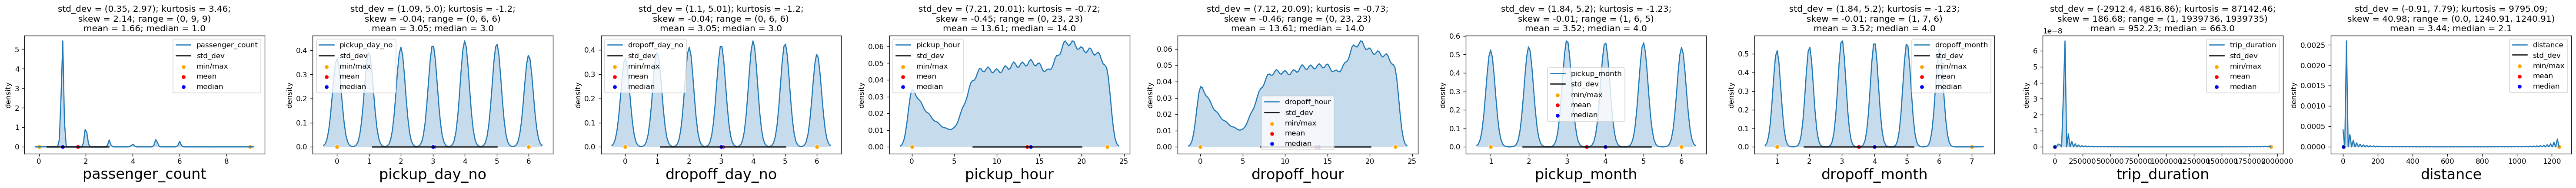

In [99]:
UVA_numeric(data,trip_Details)

In [100]:
#Interpretation
#--------------
#-> passenger count
# mean values of passenger count is 1.5 and the median value is 1.
# most of the trips has single passengers.
# Skewness is 2.14, passenger count is tends to more towards 1.
# kurtosis is 3.26, extreme values and outliers are present.

#->Pickup day no & drop of day no
#* The mean and median value are almost the same.
#* It follows uniform distribution and doesnot provide any insight so removing the data for further analysis.

#->Pickup hour & drop off hour
#* we can intrepret that most of the pick up's and drops happend between 6am to 20pm of the day.
#* skewness is -0.45 which is negative or left skewed, which is inclined to the early time.
#* Kurtosis is -0.72, extreme values and outliers are not present.

#->Pickup month & drop off month
#* Most of the pick up are happened in the first 6 months.
#* The median is greater than the mean.
#* Skewness is -0.01 which is negative or left skewed, which is inclined to the begining months.
#* Kurtosis is -1.23, there is no extreme values or outliers present.

#-> trip duration 
#* Most of the trip duration were short.
#* Skewness is 186.68 which is positively skewed and indicates that most of the trips are short time period.
#* Kurtosis is 87142 show that there is extreme values or outliers present.

#->Distance
#*Most of the distance were short distance and Zero.
#* Skewness is 40.98 which is positively skewed and indicates that most of the distance are short.
#* Kurtosis is 9795.09 show that there is extreme values or outliers present.

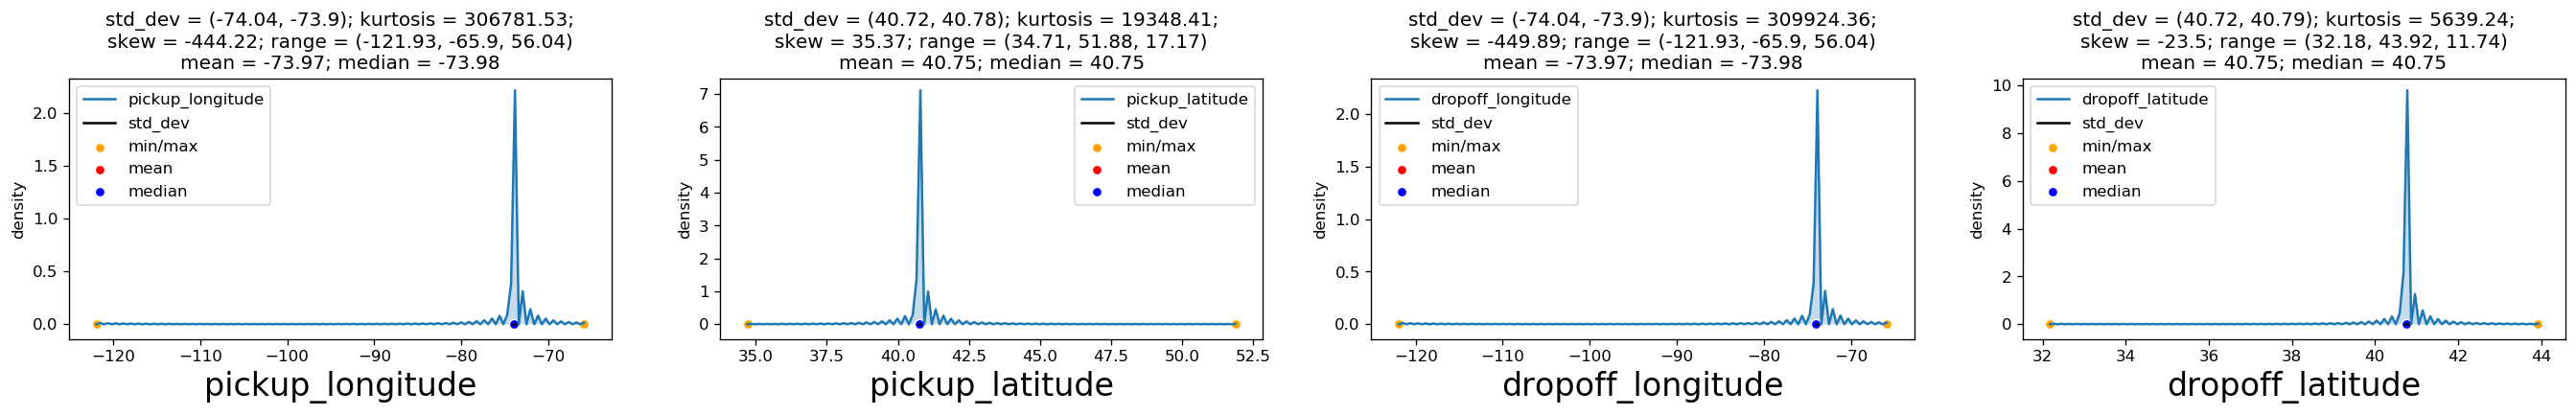

In [101]:
UVA_numeric(data,Lat_long)

In [102]:
#Intrepretation
#--------------
#Pick up longitute and drop off longitutude are left skewed.
#Pick up latitude and drop off latitude are right skewed.
# outliers and extreme values are prensent in all the variables.

In [103]:
def UVA_category(data, var_group):
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 80)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

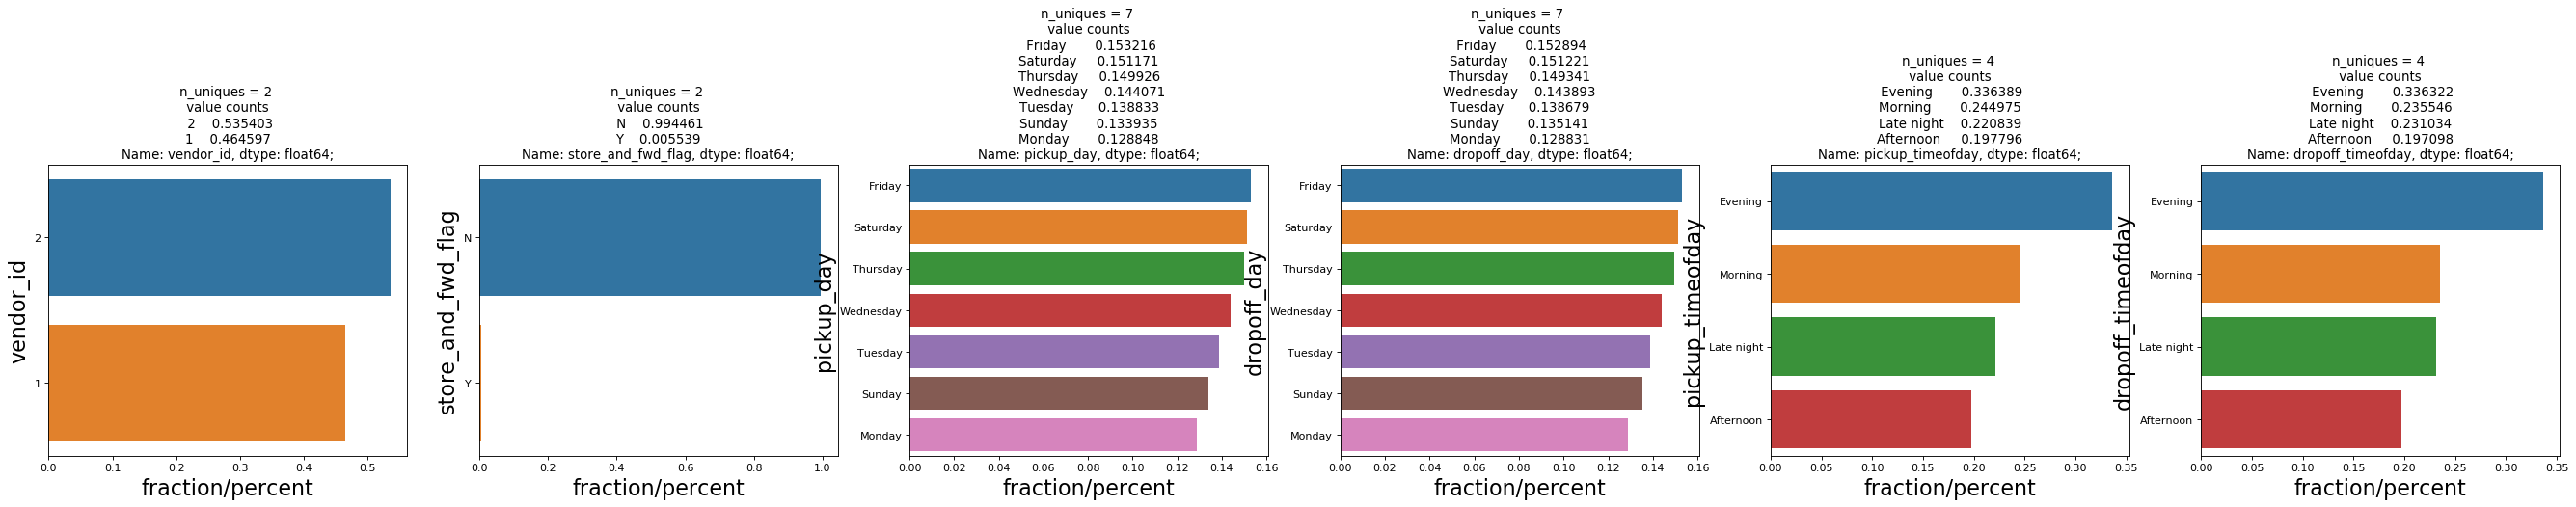

In [104]:
UVA_category(data,cat_var)

In [33]:
#Intrepretaion
#-------------
#-> Vendor ID
#*Vendor 2 had more trip than vendor 1.

#->Store and Fwd flag
# We see that 99% of the data is not stored and forward trip.

#->pickup day & drop off day
#*Most of the pick and drop happened on friday.

#-> pickup time & drop off time
#*Most of the pick and drop happened at the evening time.

In [105]:
#Outlier Treatment
#-----------------

def UVA_outlier(data, var_group,include_outlier = True):
    size = len(var_group)
    plt.figure(figsize = (7*size,4), dpi = 100)
  
    #looping for each variable
    for j,i in enumerate(var_group):
    
        # calculate interquartile range
        quant25 = data[i].quantile(0.25)
        quant75 = data[i].quantile(0.75)
        IQR = quant75 - quant75
        # calculate the outlier cutoff
        med = data[i].median()
        whis_low = med-(1.5*IQR)
        whis_high = med+(1.5*IQR)
        
        # Calculating Number of Outliers
        outlier_high = len(data[i][data[i]>whis_high])
        outlier_low = len(data[i][data[i]<whis_low])
        if include_outlier == True:
          print(include_outlier)
          #Plotting the variable with every information
          plt.subplot(1,size,j+1)
          sns.boxplot(data[i], orient="v")
          plt.ylabel('{}'.format(i))
          plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
        else:
              # replacing outliers with max/min whisker
              data2 = data[var_group][:]
              data2[i][data2[i]>whis_high] = whis_high+1
              data2[i][data2[i]<whis_low] = whis_low-1
      
              # plotting without outliers
              plt.subplot(1,size,j+1)
              sns.boxplot(data2[i], orient="v")
              plt.ylabel('{}'.format(i))
              plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      

True
True
True
True
True
True
True
True
True


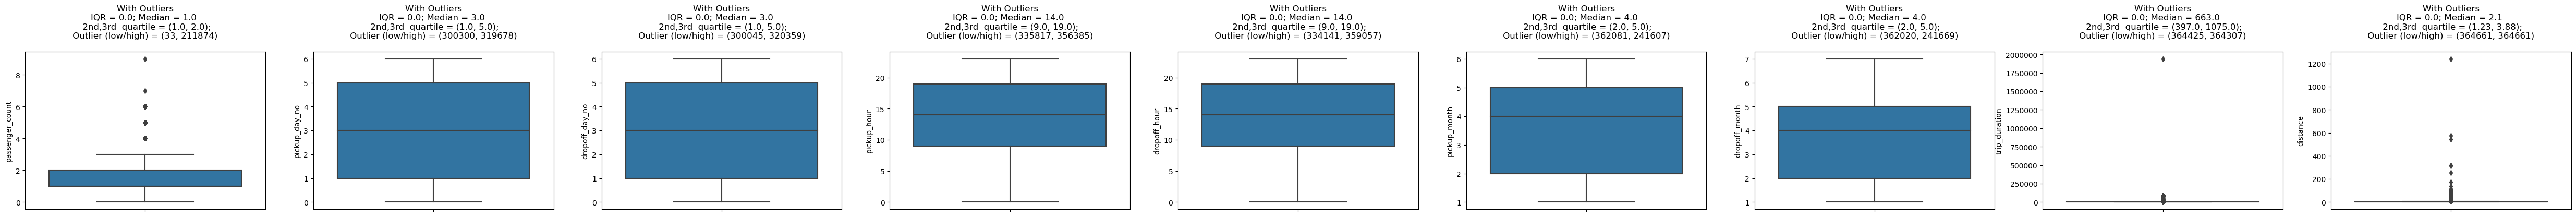

In [106]:
UVA_outlier(data,trip_Details,)

C:\Users\chrispy\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


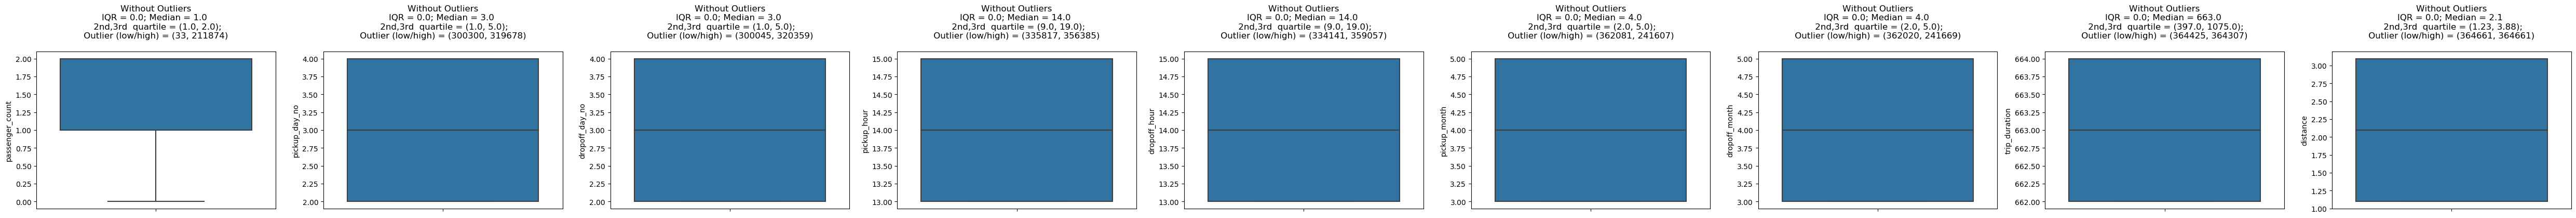

In [107]:
UVA_outlier(data,trip_Details,include_outlier=False)

In [108]:
#Interpretation
#--------------
# from passenger count we see that mostly 1 persons took trips.
# from pick up & drop off day number we observe that day 3 has the more trips.
# from pick up hour and drop off hour we observe we see that most of the trips happened around 2o'clock.
# from pick and drop off month we understand that 4th month had more trips than any other months.
# from trip duration  we umderstand that most trip had a duration of 663.
# from distance parameter we understand that most of the trips distance is 2.1Km.

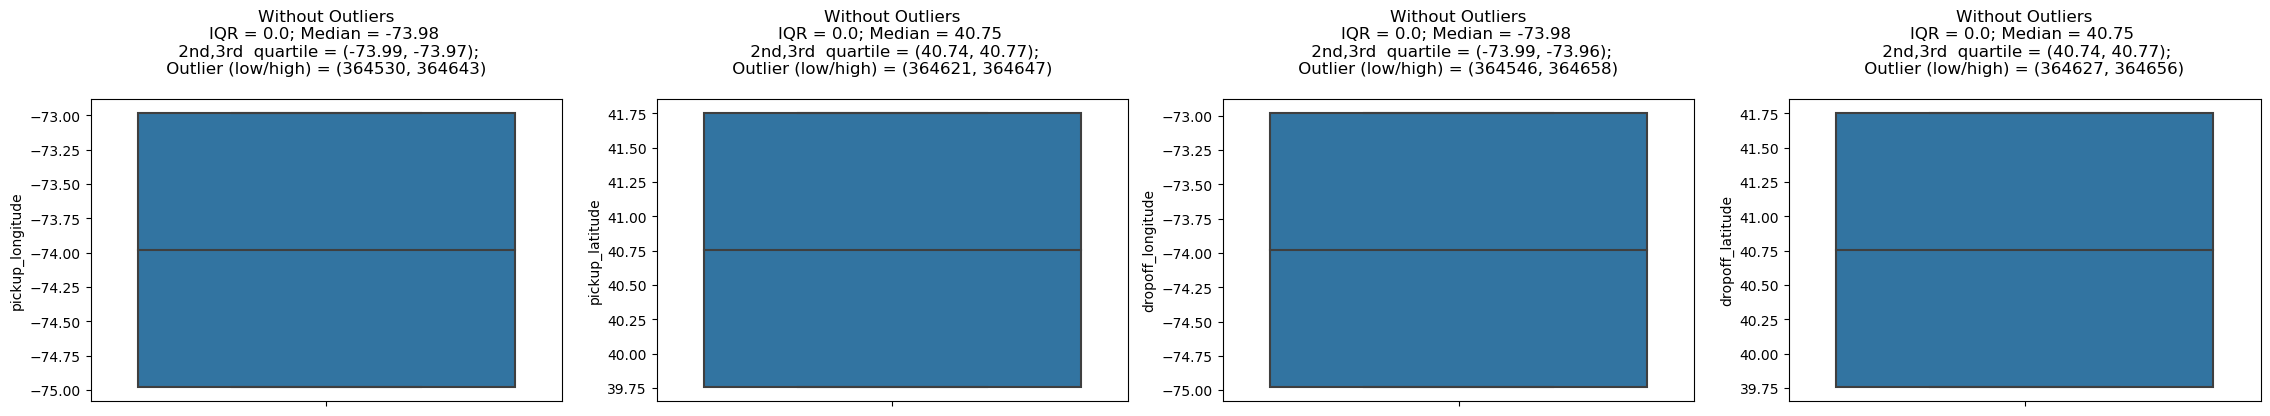

In [109]:
UVA_outlier(data,Lat_long,include_outlier=False)

In [110]:
#Intrepretaion
#-------------
#After removing the outliers we observe that most of the pick and drop longitutde is around -75 to -73 and
#most of the pick and drop latitude is around 39.75 to 41.75.

In [111]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64'])
numerical.dtypes

passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
pickup_day_no          int64
dropoff_day_no         int64
pickup_hour            int64
dropoff_hour           int64
pickup_month           int64
dropoff_month          int64
distance             float64
dtype: object

In [112]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance
passenger_count,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022,0.025758,0.025941,0.009851,0.009214,-0.001481,-0.001497,0.009175
pickup_longitude,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447,-0.016031,-0.016846,0.010754,0.011170,0.004037,0.004090,0.251482
pickup_latitude,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163,-0.029073,-0.029254,0.011433,0.018061,-0.000165,-0.000233,-0.128455
dropoff_longitude,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664,-0.001473,-0.001396,-0.022014,-0.023193,0.003883,0.003923,0.132353
dropoff_latitude,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283,-0.022028,-0.022396,0.014257,0.018173,-0.000580,-0.000621,-0.153760
trip_duration,0.013022,0.035447,-0.038163,0.020664,-0.028283,1.000000,-0.002302,-0.003369,0.002979,0.003027,0.009378,0.010135,0.125772
pickup_day_no,0.025758,-0.016031,-0.029073,-0.001473,-0.022028,-0.002302,1.000000,0.993789,-0.082079,-0.085767,-0.013626,-0.013604,0.007786
dropoff_day_no,0.025941,-0.016846,-0.029254,-0.001396,-0.022396,-0.003369,0.993789,1.000000,-0.078777,-0.089876,-0.013320,-0.013268,0.008227
pickup_hour,0.009851,0.010754,0.011433,-0.022014,0.014257,0.002979,-0.082079,-0.078777,1.000000,0.934591,-0.003301,-0.003043,-0.016269
dropoff_hour,0.009214,0.011170,0.018061,-0.023193,0.018173,0.003027,-0.085767,-0.089876,0.934591,1.000000,-0.004013,-0.004386,-0.020934


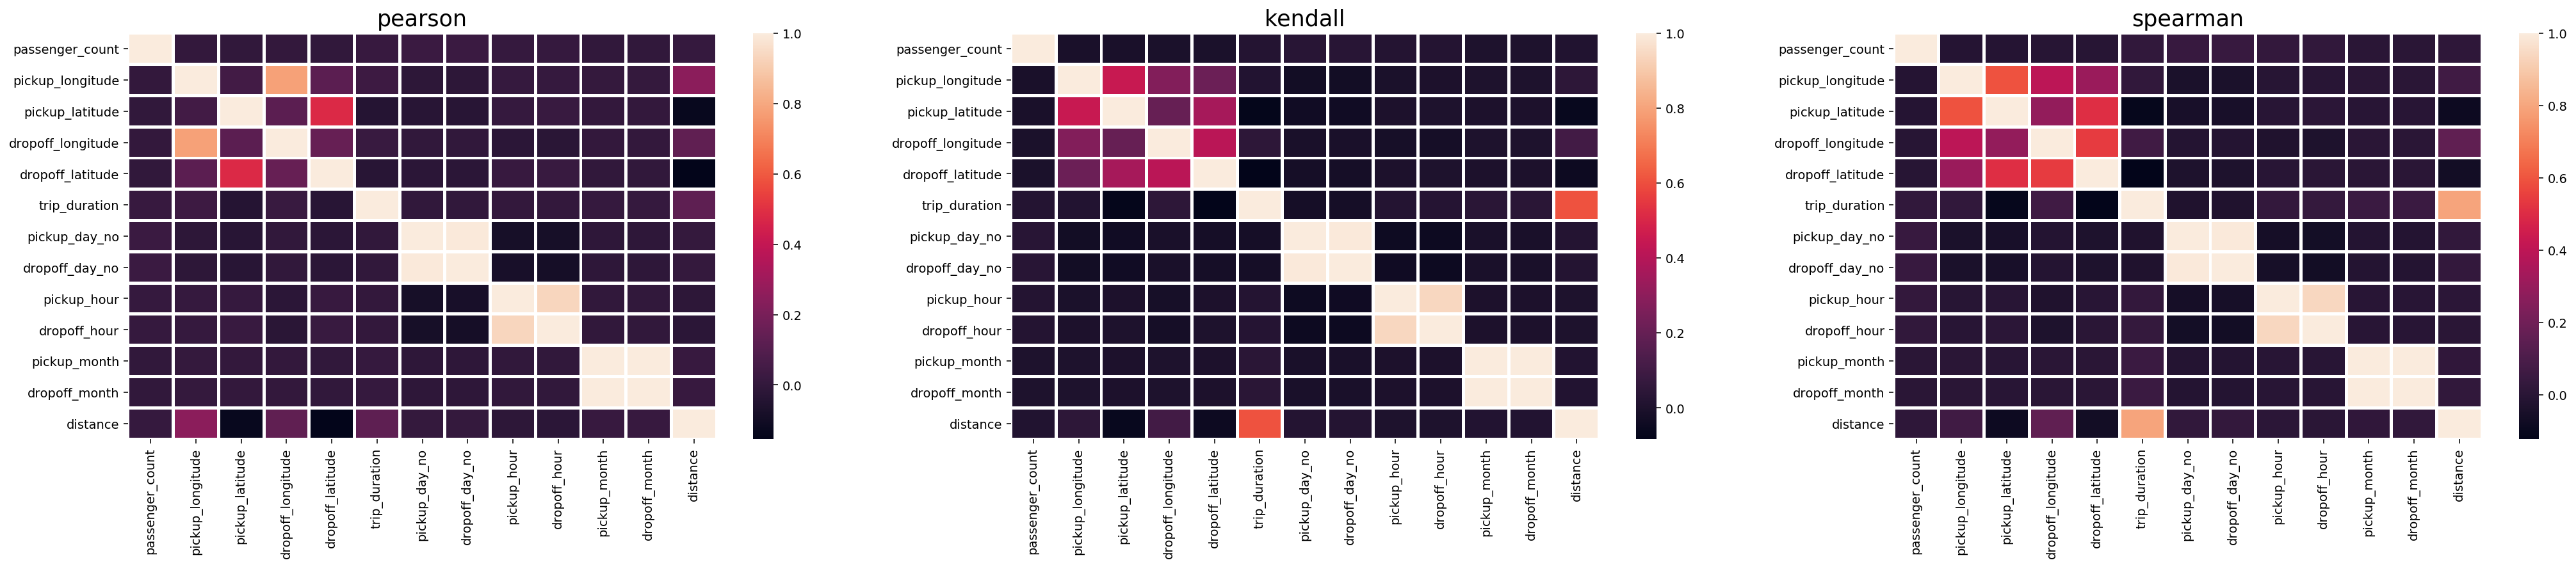

In [113]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

In [114]:
#Grouping variable
#-----------------
cat_var = ['vendor_id','store_and_fwd_flag','pickup_day','dropoff_day','pickup_timeofday','dropoff_timeofday']
trip_Details =['passenger_count','trip_duration','distance']
pickup_drop_details = ['pickup_day_no','dropoff_day_no','pickup_hour','dropoff_hour','pickup_month','dropoff_month']
Lat_long = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']

<Figure size 840x560 with 0 Axes>

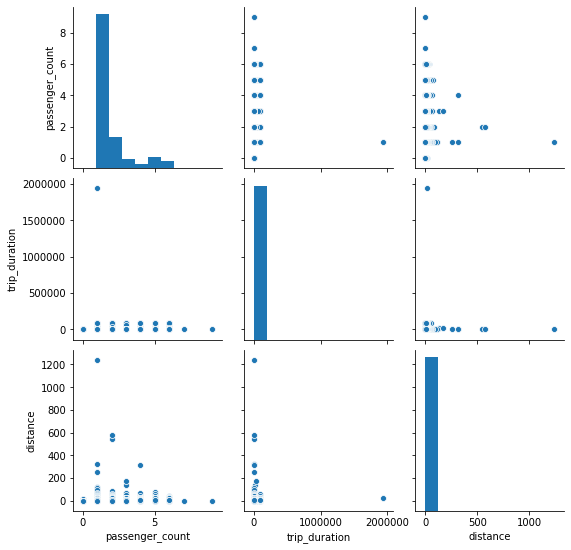

In [115]:
#Bivariate analysis[Cont-Cont]
#-----------------------------
plt.figure(dpi=140)
sns.pairplot(numerical[trip_Details])

In [116]:
var = []
var.extend(trip_Details)
var.extend(pickup_drop_details)
var.extend(Lat_long)

In [117]:
#taking log of every value to negate outliers
for column in var:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1
  
  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x))

C:\Users\chrispy\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\chrispy\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 840x560 with 0 Axes>

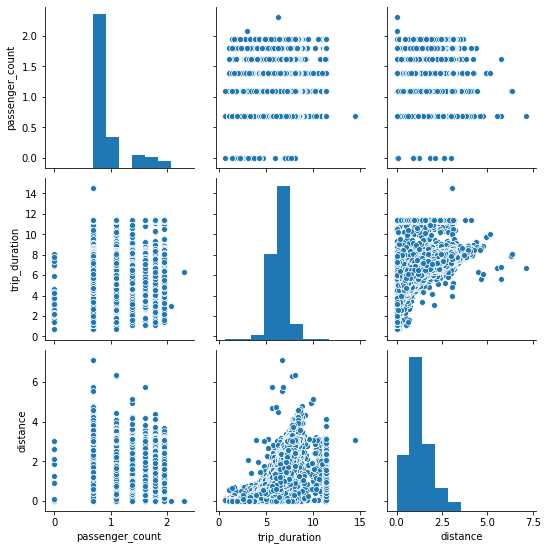

In [118]:
plt.figure(dpi=140)
sns.pairplot(numerical[trip_Details])

<Figure size 840x560 with 0 Axes>

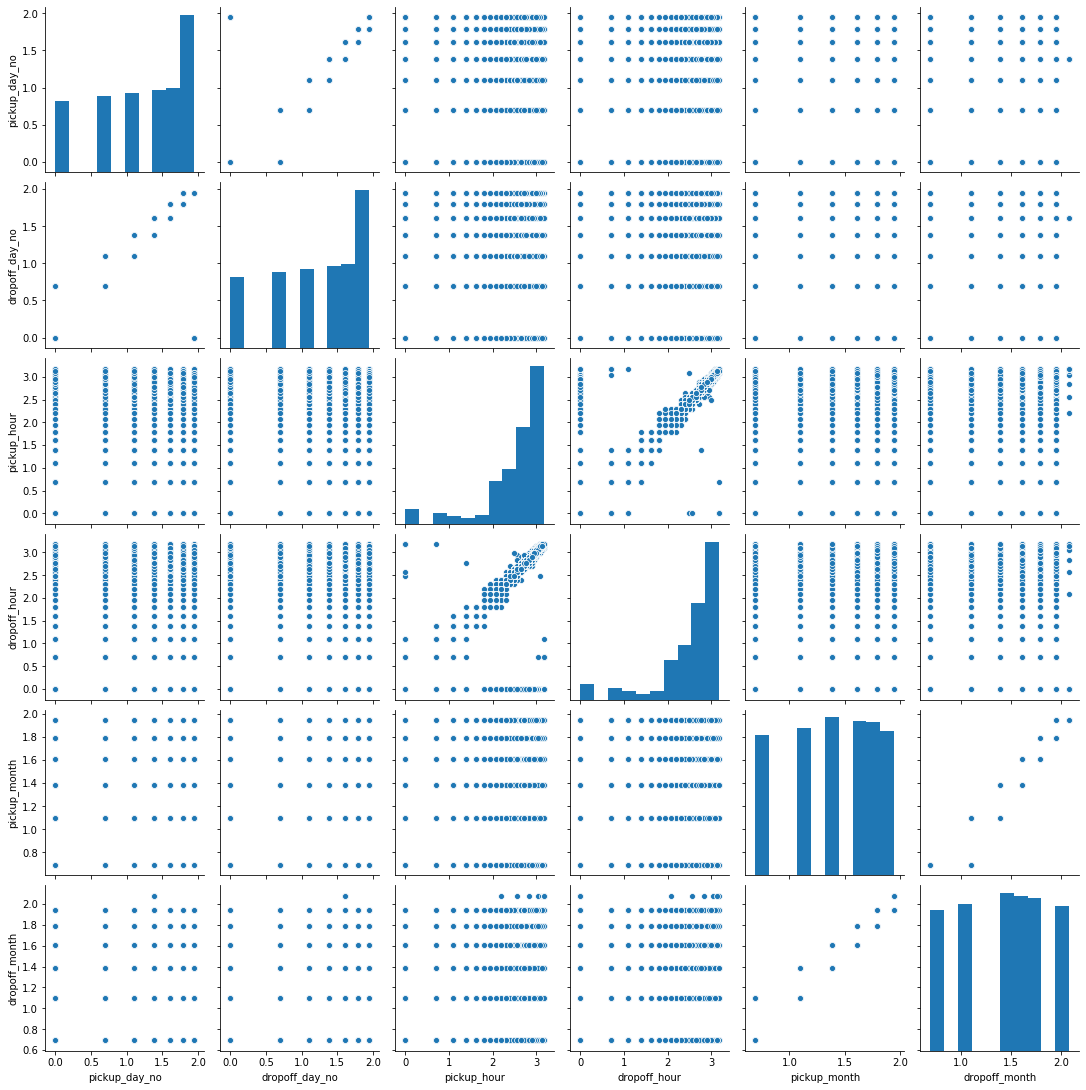

In [119]:
plt.figure(dpi=140)
sns.pairplot(numerical[pickup_drop_details])

<Figure size 840x560 with 0 Axes>

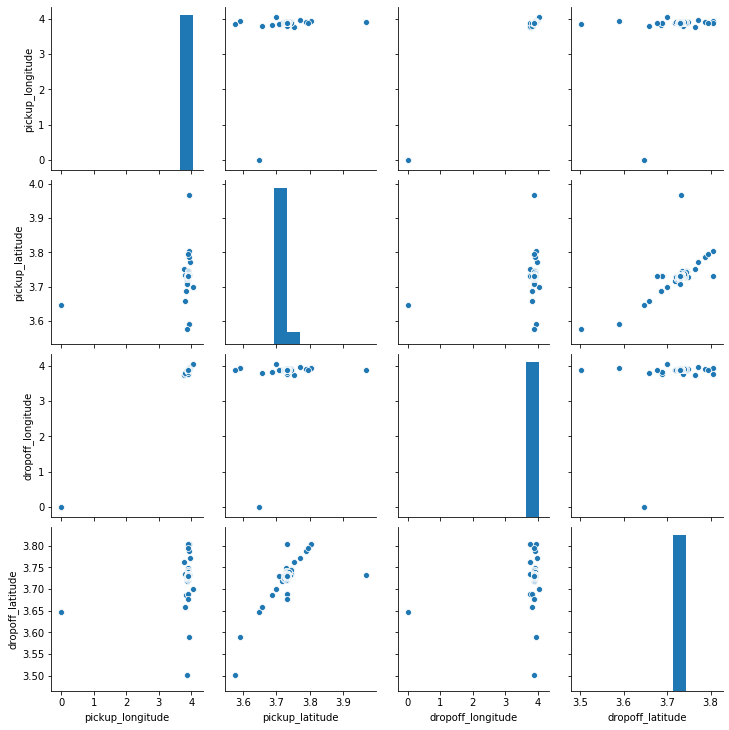

In [120]:
plt.figure(dpi=140)
sns.pairplot(numerical[Lat_long])

In [121]:
#Interpretation
#--------------
#*pickup and drop variables have a good correlation
#*distance and trip duration have correlation

In [122]:
trip_Details =['passenger_count','trip_duration','distance']
bi_cat_var = ['vendor_id','store_and_fwd_flag','pickup_day','pickup_day_no','pickup_timeofday','pickup_hour','pickup_month']

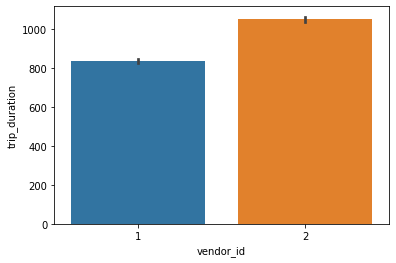

In [123]:
#Bivariate analysis[cont-cat]
#----------------------------

#*which ventor id has highest trip duration

sns.barplot(y='trip_duration',x='vendor_id',data=data,estimator=np.mean)

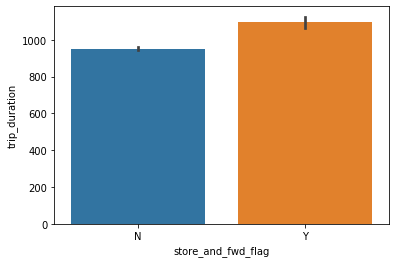

In [124]:
# wheather store and forward data has more trip duration
sns.barplot(y="trip_duration",x="store_and_fwd_flag",data=data)

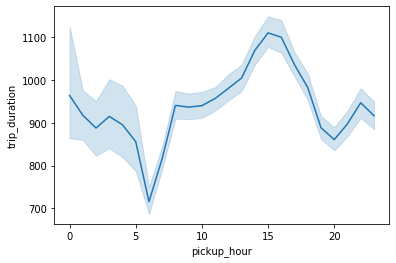

In [125]:
# which time has more trip duration
sns.lineplot(x='pickup_hour',y='trip_duration',data=data)

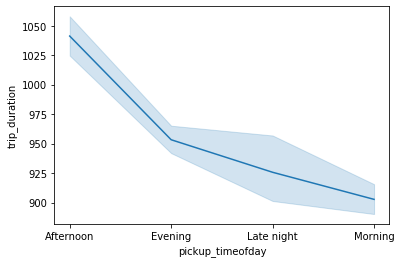

In [126]:
#which pick time has more trip duration
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=data)

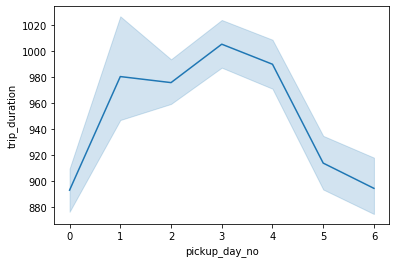

In [127]:
#which pick up daty has more trip duration
sns.lineplot(x='pickup_day_no',y='trip_duration',data=data)

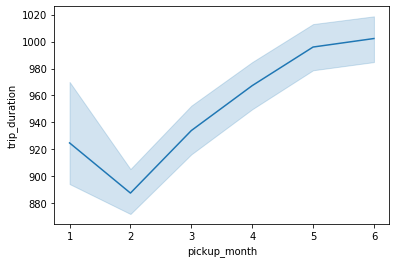

In [128]:
#Which pick up month has more trip duration
sns.lineplot(x='pickup_month',y='trip_duration',data=data)

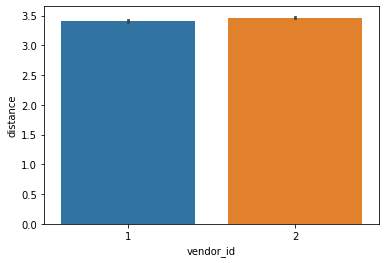

In [129]:
#which vendor id has more distance covered
sns.barplot(y='distance',x='vendor_id',data=data,estimator=np.mean)

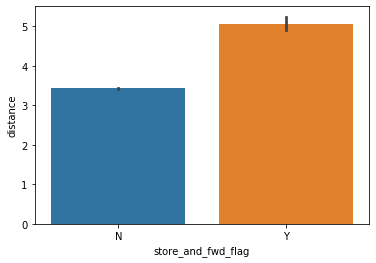

In [130]:
#which store and forward data has more distance covered
sns.barplot(y='distance',x='store_and_fwd_flag',data=data)

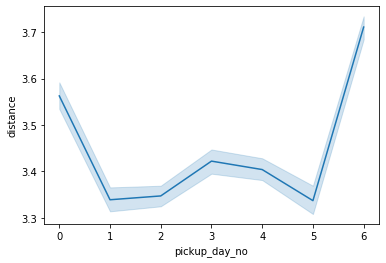

In [131]:
#which pack up day has more distance covered
sns.lineplot(x='pickup_day_no',y='distance',data=data)

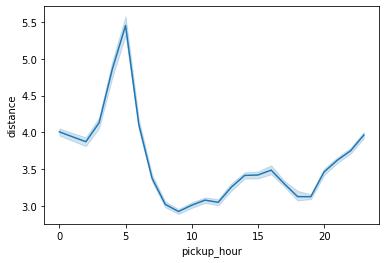

In [132]:
#which pick up hour has more distance covered
sns.lineplot(x='pickup_hour',y='distance',data=data)

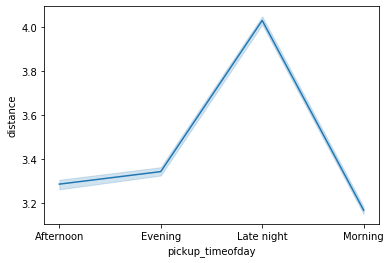

In [133]:
#which pick up time has more distance covered
sns.lineplot(x='pickup_timeofday',y='distance',data=data)

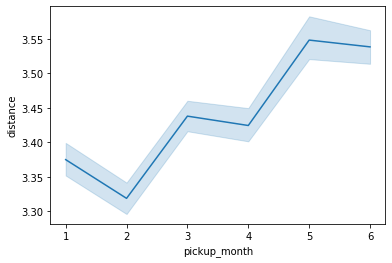

In [134]:
#which pick up month has more distance covered
sns.lineplot(x='pickup_month',y='distance',data=data)

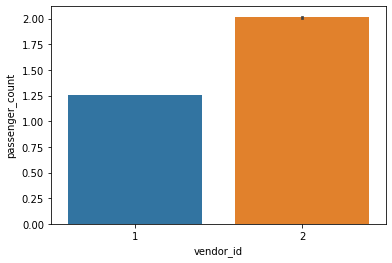

In [135]:
#which vendor id has more passenger count?
sns.barplot(y='passenger_count',x='vendor_id',data=data)

In [136]:
#Interpretation
#--------------
#*Vendor id 2 and stored &forwarded has more trip duration
#*Afternoons has more trip duration
#*3rd day and 6th months has more trip duration

#Distance is equally distributed for both vendors
#stored &forwarded has more distance covered
#early morning &Late night has more distance covered
#6th months has more distance covered.

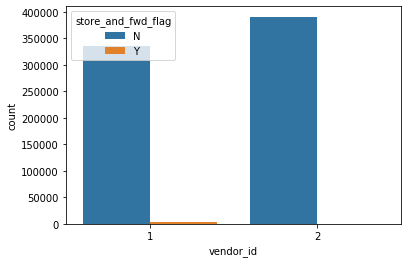

In [137]:
#Bivariate analysis[cat-cat]
#----------------------------
sns.countplot(x ='vendor_id', hue = "store_and_fwd_flag", data = data)

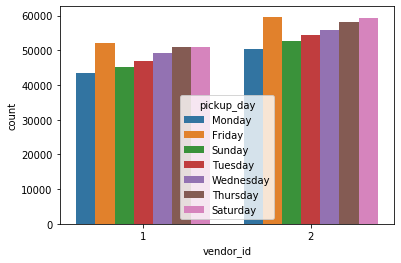

In [138]:
sns.countplot(x ='vendor_id', hue = "pickup_day", data = data)

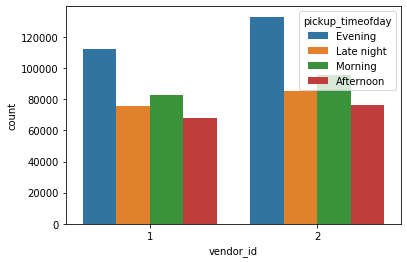

In [139]:
sns.countplot(x ='vendor_id', hue = "pickup_timeofday", data = data)

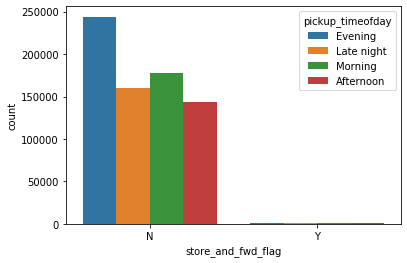

In [140]:
sns.countplot(x ='store_and_fwd_flag', hue = "pickup_timeofday", data = data)

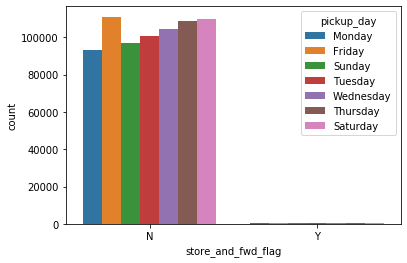

In [142]:
sns.countplot(x ='store_and_fwd_flag', hue = "pickup_day", data = data)

In [ ]:
#Intrepretation
#--------------
#Vendor id 2 has more contribution more data and most of the trips are not stored.  

In [144]:
#Multivariate Analysis
#----------------
data.pivot_table('vendor_id', ['pickup_day', 'pickup_timeofday'], 'store_and_fwd_flag', aggfunc='sum')

store_and_fwd_flag               N    Y
pickup_day pickup_timeofday            
Friday     Afternoon         31392  161
           Evening           56181  209
           Late night        40069  144
           Morning           43087  160
Monday     Afternoon         28887  136
           Evening           52600  166
           Late night        22892   78
           Morning           39461  151
Saturday   Afternoon         33762   95
           Evening           53332  195
           Late night        51734  166
           Morning           30057   97
Sunday     Afternoon         32147  103
           Evening           46277  176
           Late night        44989  134
           Morning           26349   79
Thursday   Afternoon         31860  124
           Evening           57386  252
           Late night        32268  126
           Morning           45438  159
Tuesday    Afternoon         30356  127
           Evening           55121  187
           Late night        25270   81
           Morning           44395  146
Wednesday  Afternoon         31274  153
           Evening           55964  194
           Late night        28421   81
           Morning           44794  160

In [ ]:
#Intrepretation
#--------------
# most of the trips are not stored and high number of trips happened during the evening